In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import tensorflow as tf
from typing import Tuple

In [2]:
HEIGHT = 32
WIDTH = 32
NUM_CHANNELS = 3

In [3]:
train, test = tf.keras.datasets.cifar10.load_data()
X_train, y_train = train

In [50]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
batch_size = 128
train_batch = X_train[:batch_size]
print(train_batch.shape)

(128, 32, 32, 3)


In [6]:
train_batch_out = tf.zeros_like(train_batch, dtype=tf.float32)
train_batch_out.shape

TensorShape([128, 32, 32, 3])

In [7]:
image = tf.cast(train_batch[0], tf.float32)
image.shape

TensorShape([32, 32, 3])

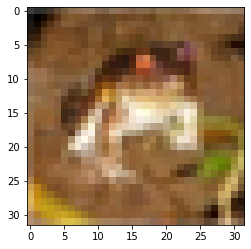

In [14]:
plt.imshow(image.numpy().astype(int))

In [15]:
HEIGHT, WIDTH = 32, 32
NUM_CHANNELS = 3

In [16]:
image_ = tf.image.resize_with_crop_or_pad(image, HEIGHT + 8, WIDTH + 8)

In [17]:
image_.shape

TensorShape([40, 40, 3])

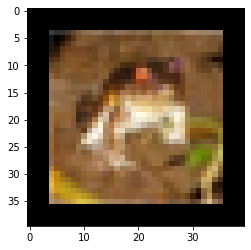

In [19]:
plt.imshow(image_.numpy().astype(int))

In [20]:
image_crop = tf.image.random_crop(image_, [HEIGHT, WIDTH, NUM_CHANNELS])

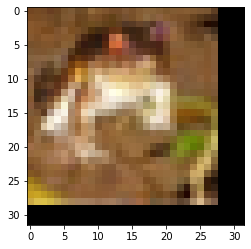

In [21]:
plt.imshow(image_crop.numpy().astype(int))

In [22]:
image_crop.shape

TensorShape([32, 32, 3])

In [25]:
image_flip = tf.image.random_flip_left_right(image_crop)

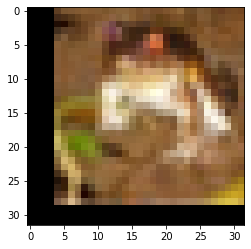

In [26]:
plt.imshow(image_flip.numpy().astype(int))

In [27]:
image_flip.numpy().mean()

84.17057

In [28]:
image_flip.numpy().std()

64.31303

In [29]:
image_flip.dtype

tf.float32

In [30]:
image_std = tf.image.per_image_standardization(image_flip)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [31]:
image_std.numpy().mean()

1.9868216e-08

In [32]:
image_std.numpy().std()

1.0000007

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


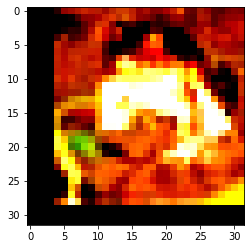

In [33]:
plt.imshow(image_std.numpy())

In [ ]:
image_std.numpy().max()

In [ ]:
image_std.numpy().min()

In [ ]:
image_std_ = (image_flip.numpy() - image_flip.numpy().mean()) / image_flip.numpy().std() 

In [ ]:
plt.imshow(image_std_)

In [34]:
train_batch_out[0] = image_std

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [43]:
#a = []
a.append(image_std)
a.append(image_std)

In [44]:
len(a)

6

In [45]:
a[0].shape

TensorShape([32, 32, 3])

In [46]:
b = tf.stack(a)
b.shape

TensorShape([6, 32, 32, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


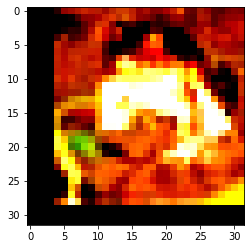

In [41]:
plt.imshow(b[1].numpy())

In [53]:
a = np.nan
import math
math.isnan(a)

True